<a href="https://colab.research.google.com/github/KshipraParihar/Final-Notebook/blob/main/Final_Notebook_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **For Data Analysis**



# <b> 1.Data Preprocessing

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## **a.Mount drive and read csv file**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path ='/content/drive/MyDrive/Colab Notebooks/project1/Hotel Bookings.csv'
hotel_df = pd.read_csv (file_path)

In [ ]:
# no. of rows and columns in the dataset.
hotel_df.shape

(119390, 32)

In [ ]:
# First 5 rows of the dataset.
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Last 5 rows of the dataset.
hotel_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


## **b.Information of data**

In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## **c.Numerical data**

In [ ]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# **Column name & data type**

In [ ]:
list(hotel_df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [ ]:
hotel_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

# **2.Dealing with null values**

In [ ]:
# Finding the missing value, showing the total null values for each column and sorting it in descending order.
hotel_df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [ ]:
# here 2 columns 'agent' &'company' having huge amount of null values,and are not much needed so we can drop them.
new_hotel_df = hotel_df.drop(['agent','company'],axis = 1)
new_hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# Replacing null values of 'country' column with the mode value of the column, So, in this case,replacing it with the country that appears the most often.
# Replacing null values of 'children' column with the mean value of the column.
new_hotel_df['country'].fillna(new_hotel_df['country'].mode().to_string(), inplace=True)
new_hotel_df['children'].fillna(round(new_hotel_df['children'].mean()), inplace=True)


In [ ]:
# There are many rows that have zero guests including adults, children and babies.
new_hotel_df[(new_hotel_df.adults+new_hotel_df.babies+new_hotel_df.children)==0].shape
# Drop Rows where there is no adult, baby and child
new_hotel_df = new_hotel_df.drop(new_hotel_df[(new_hotel_df.adults+new_hotel_df.babies+new_hotel_df.children)==0].index)

In [ ]:
new_hotel_df.isnull().sum()
# Data is cleaned,no more null values.

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# **3.Exploratory Data Analysis**

In [ ]:
preferred_hotel = new_hotel_df['hotel'].value_counts()
preferred_hotel

City Hotel      79163
Resort Hotel    40047
Name: hotel, dtype: int64

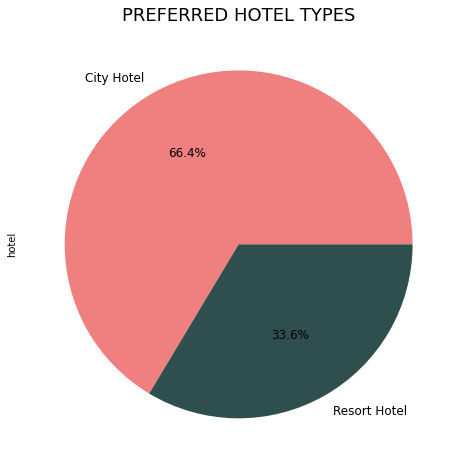

In [ ]:
# using data visualisation
preferred_hotel.plot(kind='pie',colors =['lightcoral','darkslategray'],autopct ='%1.1f%%',figsize =(8,8),fontsize= 12)
plt.title('PREFERRED HOTEL TYPES',fontsize = 18)
plt.show()

## Let's have an overview of the number of people who booked the hotel.

In [ ]:
# Looking into adults. 
# Using groupby to group according to hotel types only.
hotel_df['adults'].groupby(hotel_df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79330.0,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
Resort Hotel,40060.0,1.867149,0.697285,0.0,2.0,2.0,2.0,55.0


In [ ]:
# Looking into children. 
# Using groupby to group according to hotel types only.
hotel_df['children'].groupby(hotel_df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79326.0,0.091370,0.372177,0.0,0.0,0.0,0.0,3.0
Resort Hotel,40060.0,0.128682,0.445195,0.0,0.0,0.0,0.0,10.0


It seems that mean values for adults and children are higher. This means that resort hotels are better choice for large families.

# <b>  Cancellation rate Analysis. </b> 

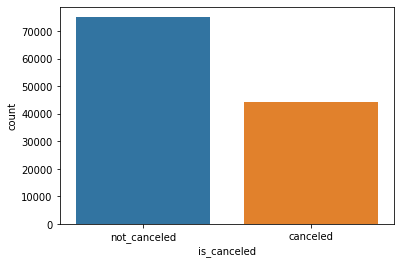

In [ ]:
hotel_df['is_canceled'] = hotel_df.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
canceled_data = hotel_df['is_canceled']
sns.countplot(canceled_data)


- It seems that majority of the bookings were not canceled.





# Cancellation rate among different type of hotel.

In [ ]:
# Cancellation percentage of 'Resort Hotel'.
resort_hotel = new_hotel_df[new_hotel_df['hotel'] == 'Resort Hotel']
resort_hotel_cancellation = resort_hotel['is_canceled'].value_counts(normalize=True)*100
resort_hotel_cancellation

0    72.232627
1    27.767373
Name: is_canceled, dtype: float64

In [ ]:
# Cancellation data of hotels(0 = Not cancelled & 1 = Cancelled)
booking_cancelled = new_hotel_df.groupby(['hotel','is_canceled'])['is_canceled'].count().unstack()
booking_cancelled 

is_canceled,0,1
hotel,,
City Hotel,46084,33079
Resort Hotel,28927,11120


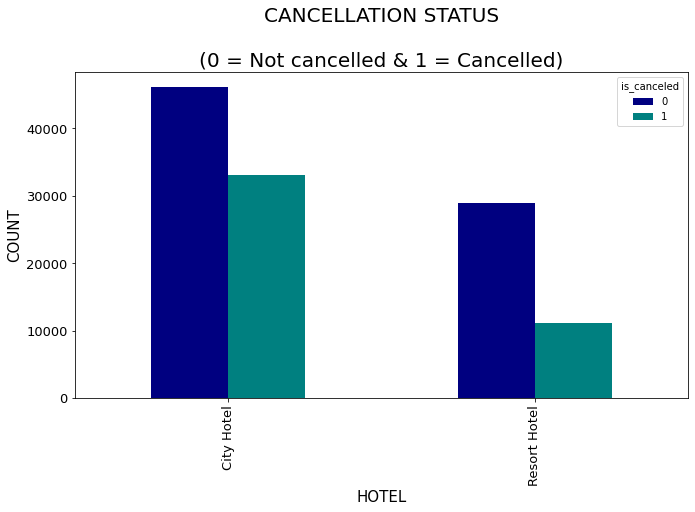

In [ ]:
# Visualising cancellation data.
booking_cancelled.plot(kind='bar',figsize=(11,6),color=['Navy','Teal'],fontsize=13)
plt.title('''CANCELLATION STATUS

(0 = Not cancelled & 1 = Cancelled)''',fontsize = 20)
plt.xlabel('HOTEL',fontsize = 15)
plt.ylabel('COUNT',fontsize = 15)
plt.show()

# <b>  Year Of Booking Analysis

In [ ]:
year_counts = new_hotel_df['arrival_date_year'].value_counts().sort_index()
year_counts

2015    21967
2016    56623
2017    40620
Name: arrival_date_year, dtype: int64

Text(0.5, 1.0, 'Number of bookings on different years')

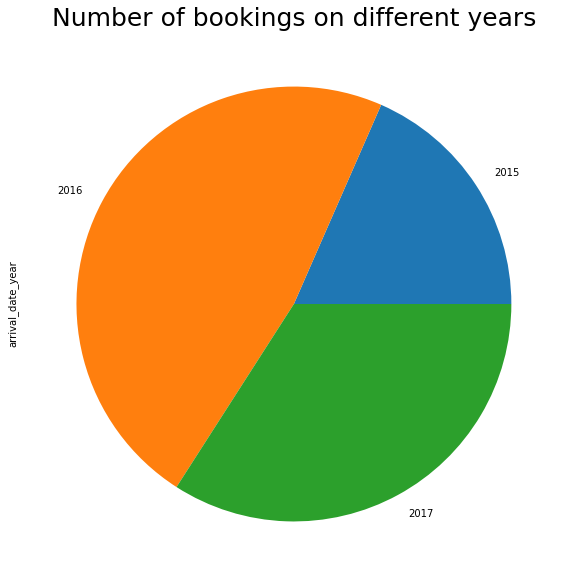

In [ ]:
#Graph representing number of bookings acroos different years
plt.rcParams['figure.figsize'] = (20,10)
year_counts.plot(kind = 'pie')
plt.grid()
plt.title('Number of bookings on different years', fontsize = 25)

## We can tell from the above graph that more than 50 percent of the bookings are done on the year 2016, following 2017 and 2015.

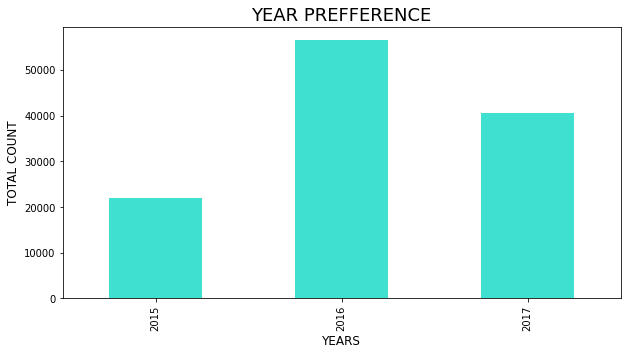

In [ ]:
# Another Way of plotting
year_counts.plot(kind = 'bar',color ='turquoise',fontsize = 10,figsize=(10,5))
plt.title('YEAR PREFFERENCE',fontsize = 18)
plt.xlabel('YEARS',fontsize = 12)
plt.ylabel('TOTAL COUNT',fontsize = 12)
plt.show()

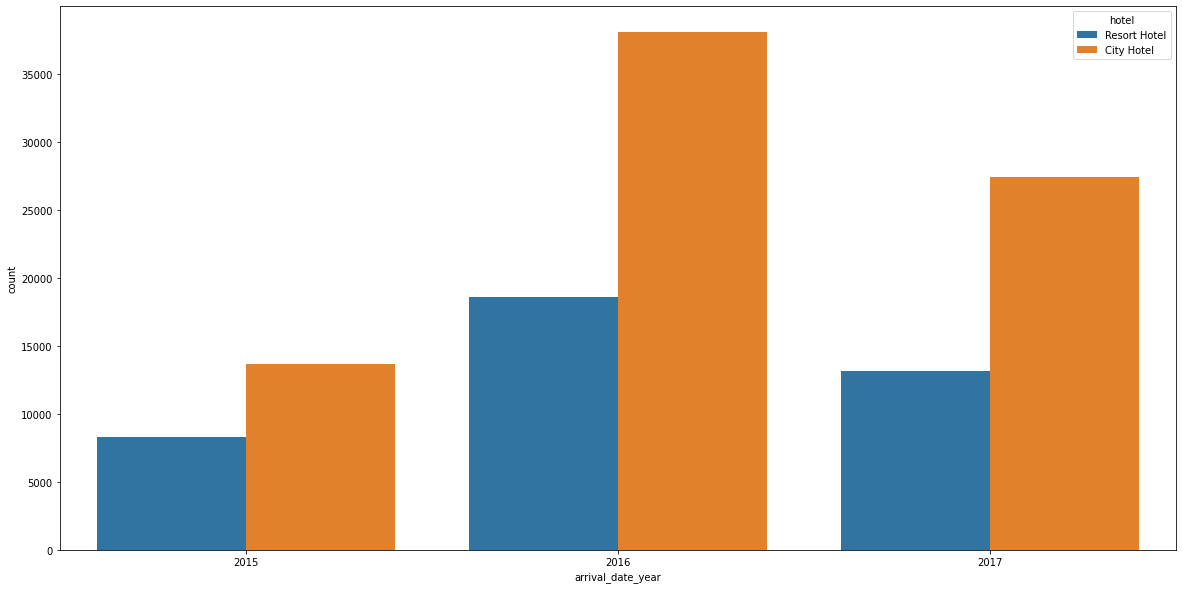

In [ ]:
#Number of bookingas across different year for Resort hotel and city hotel
sns.countplot(data = new_hotel_df, x='arrival_date_year', hue = 'hotel')
plt.rcParams['figure.figsize']=(12,8)

In [ ]:
most_preffered_month = new_hotel_df['arrival_date_month'].value_counts()
most_preffered_month

August       13861
July         12644
May          11780
October      11147
April        11078
June         10929
September    10500
March         9768
February      8052
November      6771
December      6759
January       5921
Name: arrival_date_month, dtype: int64

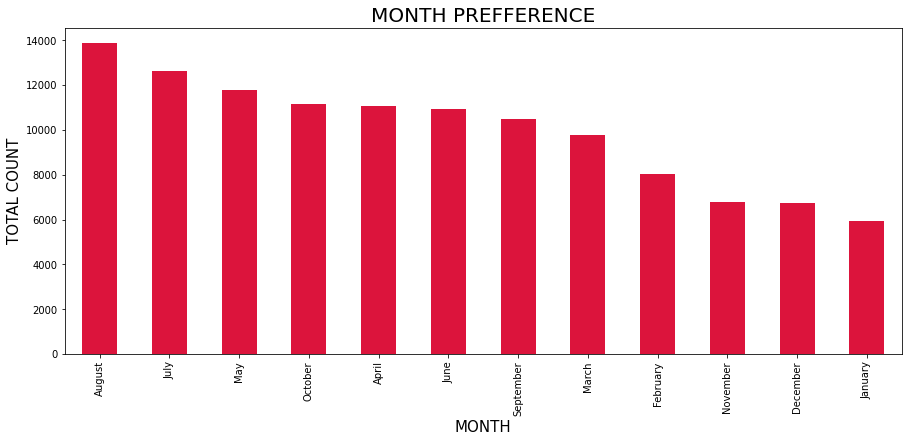

In [ ]:
most_preffered_month.plot(kind = 'bar',color ='crimson',fontsize = 10,figsize=(15,6))
plt.title('MONTH PREFFERENCE',fontsize = 20)
plt.xlabel('MONTH',fontsize = 15)
plt.ylabel('TOTAL COUNT',fontsize = 15)
plt.show()

In [ ]:
# Monthly booking of hotels.
monthly_hotel_booked = new_hotel_df.groupby(['arrival_date_month','hotel'])['hotel'].count().unstack()
monthly_hotel_booked

hotel,City Hotel,Resort Hotel
arrival_date_month,,
April,7469,3609
August,8967,4894
December,4114,2645
February,4950,3102
January,3730,2191
July,8071,4573
June,7885,3044
March,6434,3334
May,8221,3559


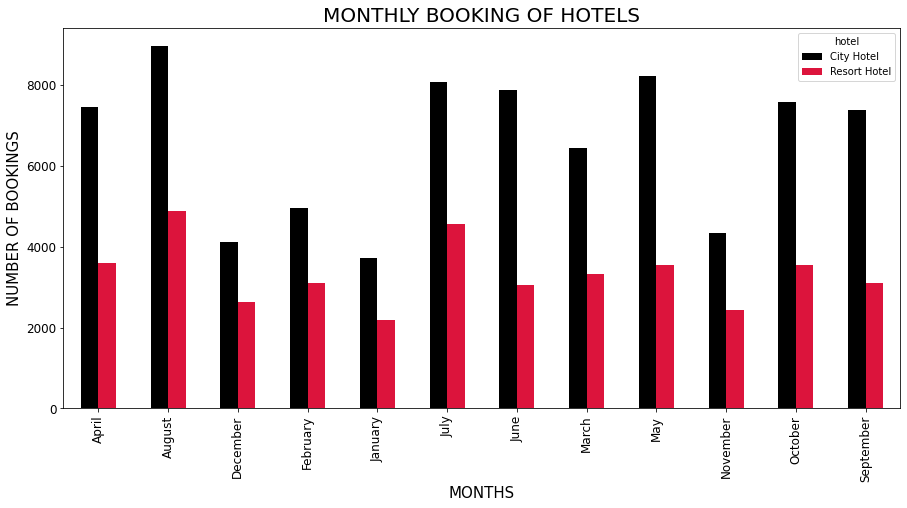

In [ ]:
# Plotting the data to make it more easy to understand.
monthly_hotel_booked.plot(kind='bar',color=['black','crimson'],fontsize =12,figsize=(15,7))
plt.title('MONTHLY BOOKING OF HOTELS',fontsize = 20)
plt.ylabel('NUMBER OF BOOKINGS',fontsize = 15)
plt.xlabel('MONTHS',fontsize = 15)
plt.show()

In [ ]:
lst3 = ['hotel', 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month' ]
period_arrival = new_hotel_df[lst3]


Text(0.5, 1.0, 'Graph showing number of arrival per day')

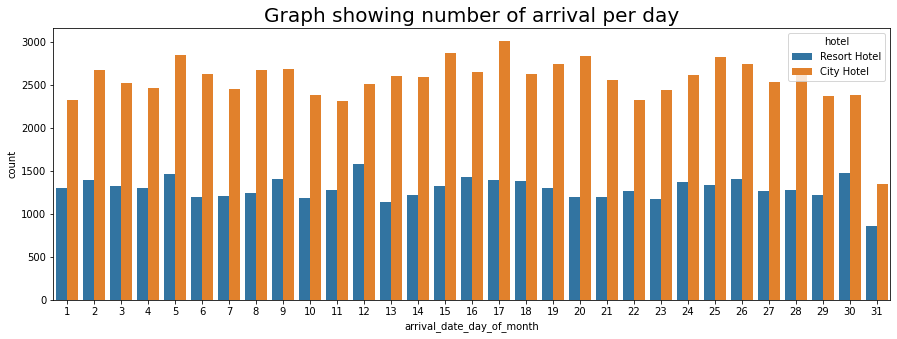

In [ ]:
plt.figure(figsize=(15,5))

sns.countplot(data = period_arrival, x = 'arrival_date_day_of_month', hue = 'hotel').set_title('Graph showing number of arrival per day', fontsize = 20)

In [ ]:
#Checking number of night stays for all the bookings
total_night_stays = (new_hotel_df['stays_in_week_nights'] + new_hotel_df['stays_in_weekend_nights']).value_counts().head(10).sort_index()
total_night_stays

1     21005
2     27632
3     27064
4     17373
5      7771
6      3846
7      8648
8      1155
10     1135
14      913
dtype: int64

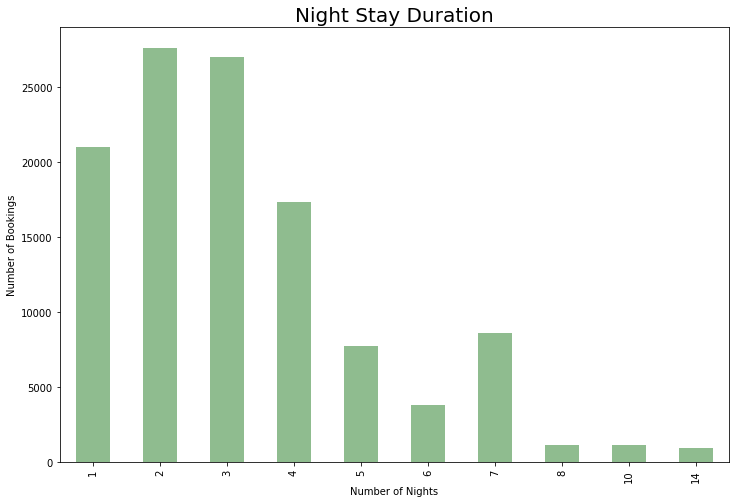

In [ ]:
#Graph representing number of bookings vs numnber of night stayed
total_night_stays.plot(kind='bar', color = 'darkseagreen')
plt.title('Night Stay Duration', fontsize = 20)
plt.ylabel('Number of Bookings')
plt.xlabel('Number of Nights')
plt.rcParams['figure.figsize']=(15,10)

Text(0.5, 1.0, 'Number of children')

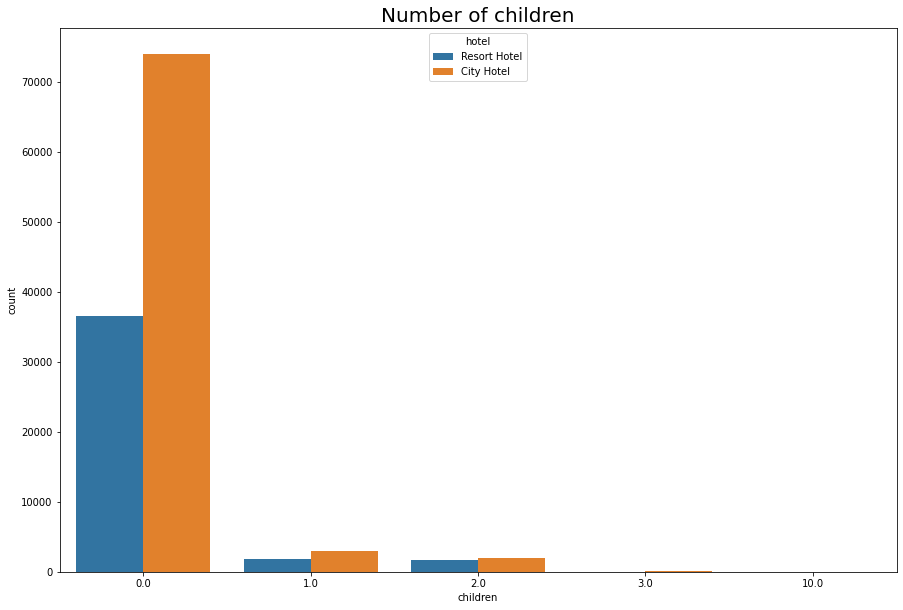

In [ ]:
sns.countplot(data = new_hotel_df, x = 'children', hue = 'hotel').set_title("Number of children", fontsize = 20)

Text(0.5, 1.0, 'Number of babies')

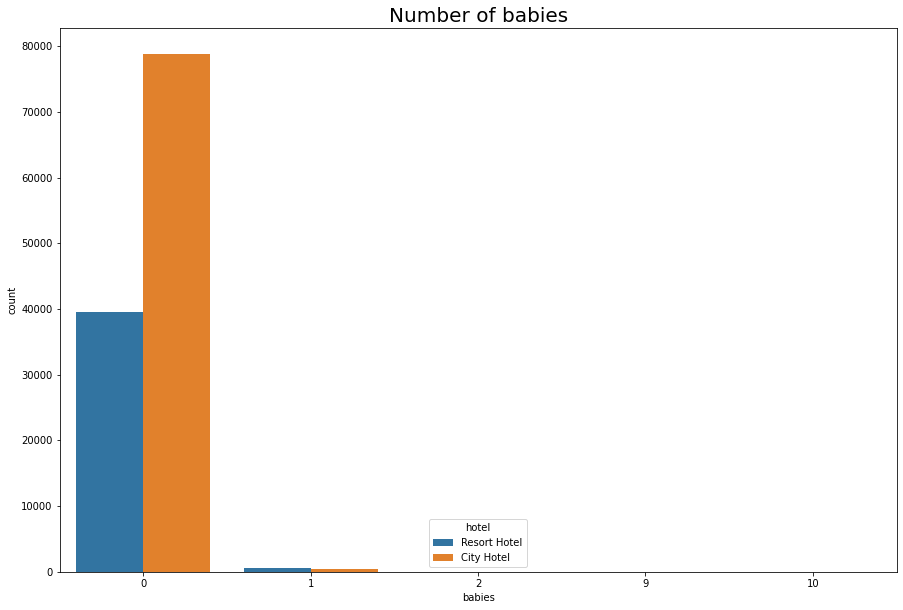

In [ ]:
sns.countplot(data = new_hotel_df, x = 'babies', hue = 'hotel').set_title("Number of babies", fontsize = 20)

In [ ]:
#Top 10 countries which made most number of bookings
country_counts = new_hotel_df['country'].value_counts().head(10)
country_counts

PRT    48483
GBR    12120
FRA    10401
ESP     8560
DEU     7285
ITA     3761
IRL     3374
BEL     2342
BRA     2222
NLD     2103
Name: country, dtype: int64

In [ ]:
len(new_hotel_df['country'].value_counts())

178

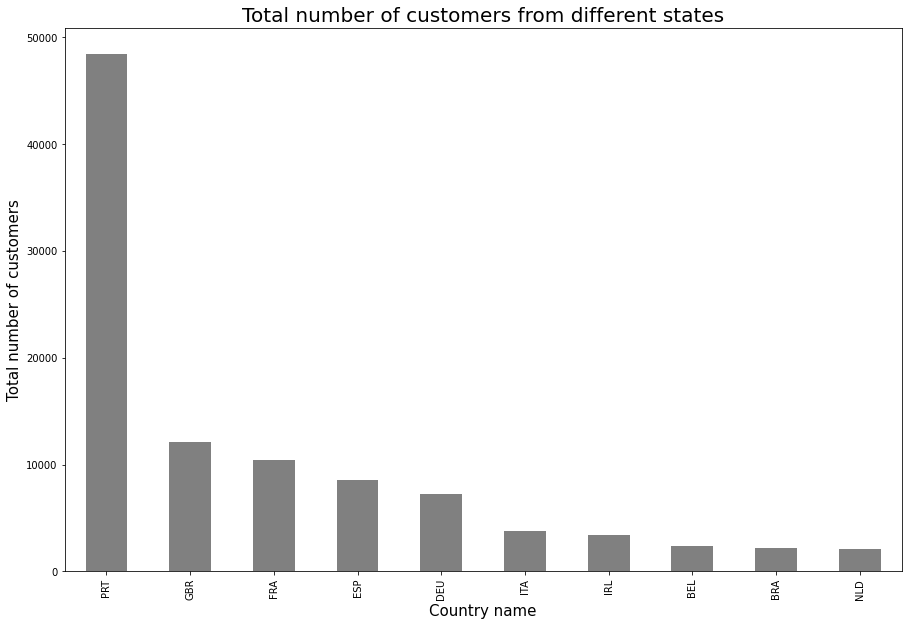

In [ ]:
#Top 10 Countries
country_counts.plot(kind = 'bar', color = 'gray')
plt.title('Total number of customers from different states', fontsize = 20)
plt.xlabel('Country name',fontsize = 15)
plt.ylabel('Total number of customers',fontsize = 15)
plt.rcParams['figure.figsize']=(15,10)

In [ ]:
#Checking number of bookings made from different source(Market segments)
market_segment_counts = new_hotel_df['market_segment'].value_counts()
market_segment_counts

Online TA        56408
Offline TA/TO    24182
Groups           19791
Direct           12582
Corporate         5282
Complementary      728
Aviation           235
Undefined            2
Name: market_segment, dtype: int64

In [ ]:
explode = (0,0.0,0.05,0.05,0.05,0.05,0.05,0.3)

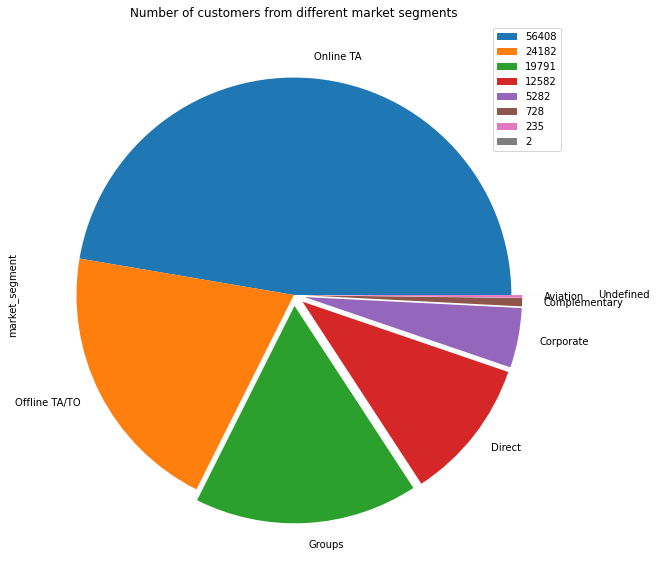

In [ ]:
#Pie chart representing number of customers from different market segments
ax =market_segment_counts.plot(kind = 'pie', figsize=(20,10),explode = explode )
plt.title('Number of customers from different market segments')

ax.legend(new_hotel_df.market_segment.value_counts())

Text(0.5, 1.0, 'Average daily rate for different months')

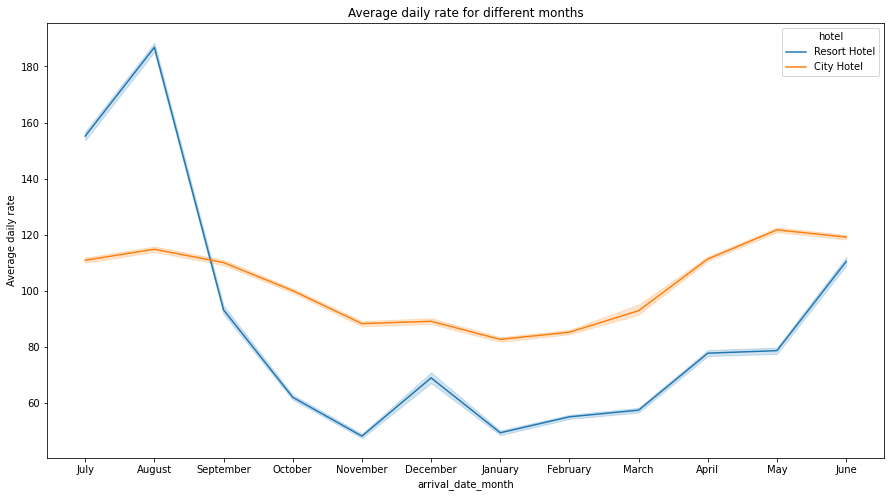

In [ ]:
plt.figure(figsize = (15,8))
sns.lineplot(x='arrival_date_month', y='adr', data=new_hotel_df, hue = 'hotel')
plt.ylabel('Average daily rate')
plt.title('Average daily rate for different months')

hotel
City Hotel      105.503191
Resort Hotel     94.983054
Name: adr, dtype: float64


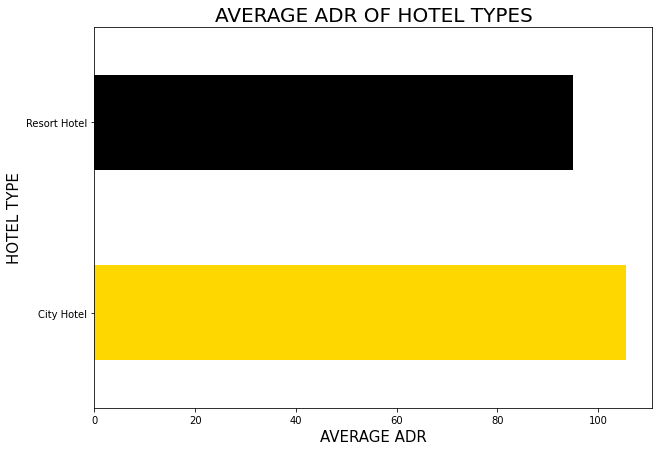

In [ ]:
# Average ADR of different types of hotel.
avg_hotel_adr = new_hotel_df.groupby(['hotel'])['adr'].mean()
print(avg_hotel_adr)

# Visualisation.
avg_hotel_adr.plot(kind='barh', figsize=(10,7),color=['gold','k'])
plt.title('AVERAGE ADR OF HOTEL TYPES',fontsize = 20)
plt.ylabel('HOTEL TYPE',fontsize = 15)
plt.xlabel('AVERAGE ADR',fontsize = 15)
plt.show()

country
DJI    273.000000
AIA    265.000000
AND    202.652857
UMI    200.000000
LAO    181.665000
MYT    177.750000
NCL    175.500000
GEO    169.015909
COM    165.305000
FRO    155.200000
Name: adr, dtype: float64


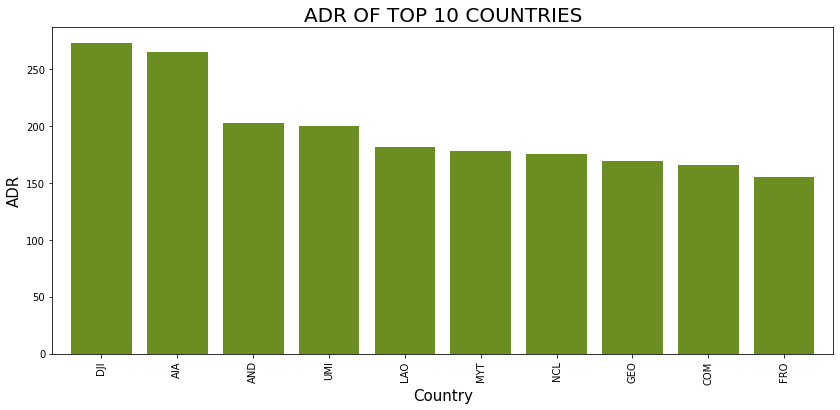

In [ ]:
# Countries with best 'adr'.
# Considering top 10 countries.
country_adr = new_hotel_df.groupby(['country'])['adr'].mean().sort_values(ascending = False)[0:10]
print(country_adr)

# Visualisation.
country_adr.plot(kind='bar', figsize=(14,6),color='olivedrab',width=0.8)
plt.title('ADR OF TOP 10 COUNTRIES',fontsize=20)
plt.xlabel('Country',fontsize=15)
plt.ylabel('ADR',fontsize=15)
plt.show()

# 'Dji' have the highest ADR

In [ ]:
# Average ADR of different months and year.
adr_month_year= new_hotel_df.groupby(['arrival_date_month','arrival_date_year'])['adr'].mean()
adr_month_year

arrival_date_month  arrival_date_year
April               2016                  88.942938
                    2017                 111.528512
August              2015                 106.086559
                    2016                 143.070508
                    2017                 164.315096
December            2015                  74.257257
                    2016                  86.671602
February            2016                  70.214125
                    2017                  76.981300
January             2016                  64.767656
                    2017                  73.930417
July                2015                  97.904852
                    2016                 125.797757
                    2017                 143.100379
June                2016                 107.017760
                    2017                 125.902174
March               2016                  79.150664
                    2017                  82.572362
May                 2016  

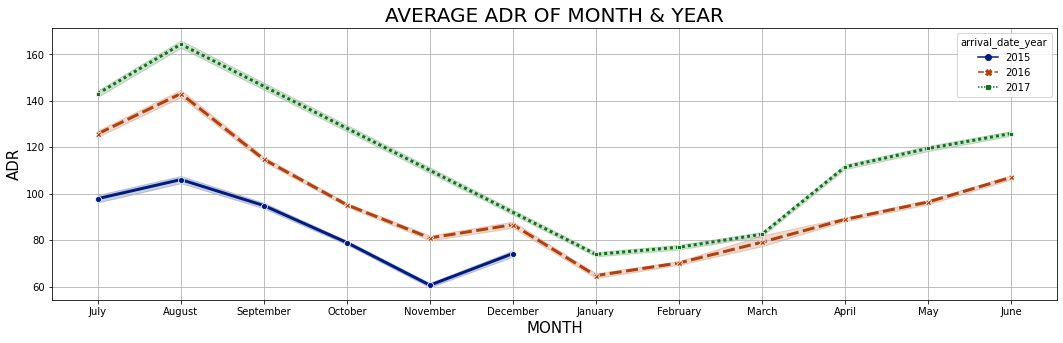

In [ ]:
# Visualisation.
line,ax = plt.subplots(figsize=(18,5)) 
sns.lineplot(x='arrival_date_month',y='adr',data=new_hotel_df,hue='arrival_date_year',style='arrival_date_year',markers=True,palette='dark',linewidth=3)
ax.set_title('AVERAGE ADR OF MONTH & YEAR', fontsize=20)
ax.set_xlabel ('MONTH',fontsize=15)
ax.set_ylabel ('ADR',fontsize=15)
plt.grid(True)
plt.show()


In [ ]:
# Unique meal type.
unique_meal_count=new_hotel_df['meal'].value_counts()
unique_meal_count

BB           92236
HB           14458
SC           10549
Undefined     1169
FB             798
Name: meal, dtype: int64

In [ ]:
percentage_meal_count = new_hotel_df['meal'].value_counts(normalize= True)*100
percentage_meal_count

BB           77.372704
HB           12.128177
SC            8.849090
Undefined     0.980622
FB            0.669407
Name: meal, dtype: float64

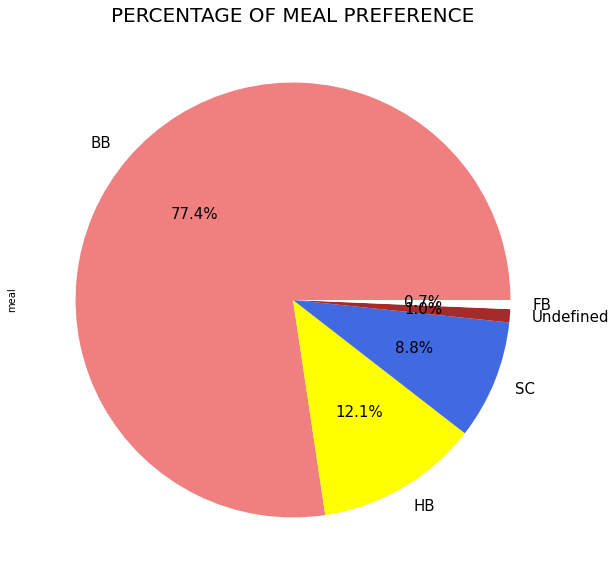

In [ ]:
# Visualisation of percentage meal count
percentage_meal_count.plot(kind = 'pie',labels=percentage_meal_count.index,figsize=(10,10),autopct='%0.1f%%',colors=['lightcoral','yellow','royalblue','brown','white'],fontsize=15)
plt.title('PERCENTAGE OF MEAL PREFERENCE', fontsize=20)
plt.show()

In [ ]:
# Car parking requirement count.
car_parking = new_hotel_df['required_car_parking_spaces'].value_counts()
car_parking

0    111801
1      7376
2        28
3         3
8         2
Name: required_car_parking_spaces, dtype: int64

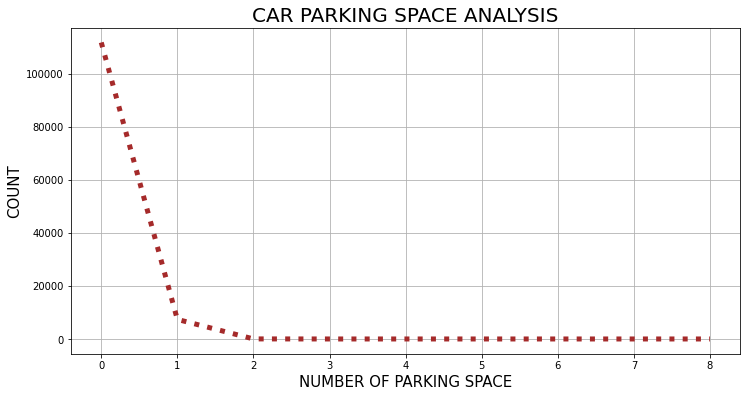

In [ ]:
# Visualisation.
car_parking.plot(kind='line',color='brown',linestyle=':',linewidth=5,figsize =(12,6))
plt.title('CAR PARKING SPACE ANALYSIS',fontsize = 20)
plt.ylabel('COUNT',fontsize = 15)
plt.xlabel('NUMBER OF PARKING SPACE',fontsize = 15)
plt.grid(True)
plt.show()

0    115455
1      3755
Name: is_repeated_guest, dtype: int64


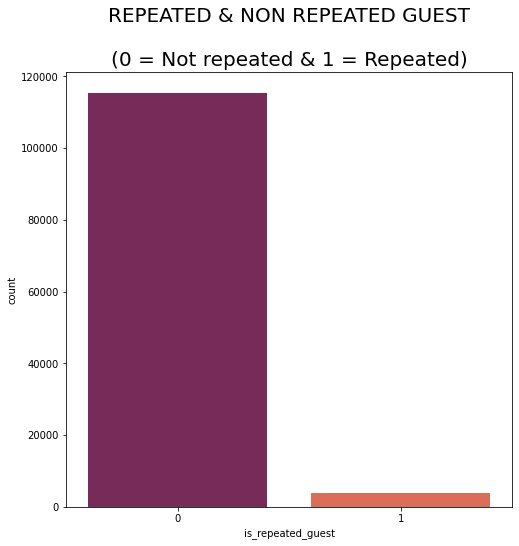

In [ ]:
# Count of repeated and non-repeated guest.(0 = Not repeated & 1 = Repeated)
print(new_hotel_df['is_repeated_guest'].value_counts())

# Visualisation.
plt.figure(figsize=(8,8))
sns.countplot(data = new_hotel_df, x = 'is_repeated_guest',palette='rocket')
plt.title('''REPEATED & NON REPEATED GUEST

(0 = Not repeated & 1 = Repeated)''',fontsize=20)
plt.show()

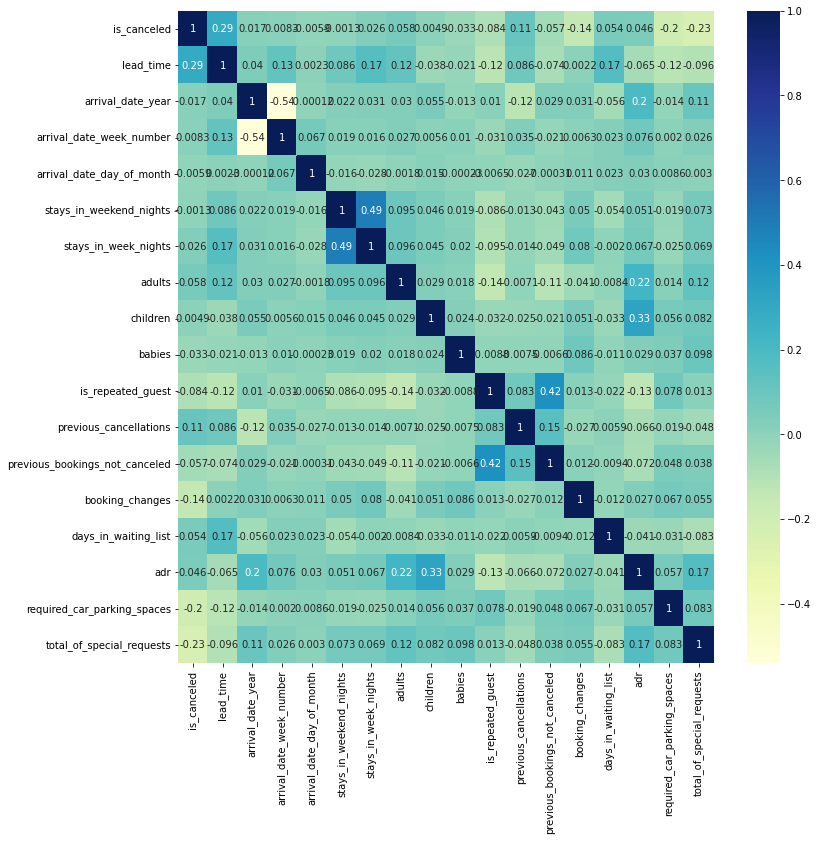

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(new_hotel_df.corr(), cmap= 'YlGnBu' ,annot=True);
plt.show()

# <b> 4.Conclusion

1.Majority of the customers are transient, which means Walk-in Guests or in a way bookings done by customer through websites without the involvement of middleman.

2.'City hotels' and 'Resort hotels' are two types of hotels present in the dataset, out of which, 'City hotels’ are more preferred by the customers than the latter. (66.4% customer prefers 'City hotels' whereas 33.6% customer prefers 'Resort hotels’)

3.Out of 119000 customer dataset, 75166 customers checked in hotel while 44224 customers cancelled their bookings, that is about 37% of the booking got cancelled whereas 63% customers checked in the hotel.

4.Majority of the deposit type is of 'No deposit' type, which itself concludes the high rate of cancellation rate.

5.From the given dataset, we can see 2016 is the year in which hotel bookings are the highest.

6.We can also see the trend in the middle of the year as those season has less weather condition and holidays are more during that season. We can also infer that winter season has the lowest number of bookings around the globe and we can assume it because of the weather condition.

7.Out of all months, 'August' witnessed highest number of hotel bookings whereas 'January' witnessed the least.

8.City hotels are of in high demand compared to resort in all aspects due to its reliability of majority of the population.

9.Most of the customers prefer to stay for one, two and three nights and majority its two and three night which tops.

10.Among the top 10 countries with respect to number of bookings, most of them are European countries which belongs to the list of which Portugal stands first with 48.5k bookings.

11.For resort hotels, ADR is more expensive during June, July, August and September whereas for city hotels, ADR is more expensive during May, June July and August. So, Overall ADR of both cities are more expensive between May and September.

12.Its observed that average ADR is incrementing every year from 2015 to 2017, which clearly states that hotel business is scaling up every year.

13.Online Travel agencies provides high amount of leads and customers following Offline TA, Groups, Direct, etc., So, we an conclude that we need to focus our marketing area on online TA since majority of the visitors tend to reach out to them.

14.After analyzing the meal data, its found that 77.3% of customers prefers BB(Bread & Breakfast).

15.Most of the hotels have 0 to 1 car parking space.

16. Given that we do not have repeated guests, we should target our advertisement on guests to increase returning guests. 


